In [ ]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation='linear', use_bias=True, kernel_initializer='Orthogonal'))
model.add(layers.Dense(1, use_bias=True))
model.compile(loss='mae', optimizer='adam')
model.summary()

for layer in model.layers:
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    print(layer.get_weights())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

dense (2, 3)
[array([[-0.8652812 , -0.4801522 ,  0.14402182],
       [-0.3082149 ,  0.28300452, -0.9082466 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]
dense_1 (3, 1)
[array([[ 0.7679651 ],
       [ 0.954034  ],
       [-0.44620466]], dtype=float32), array([0.], dtype=float32)]


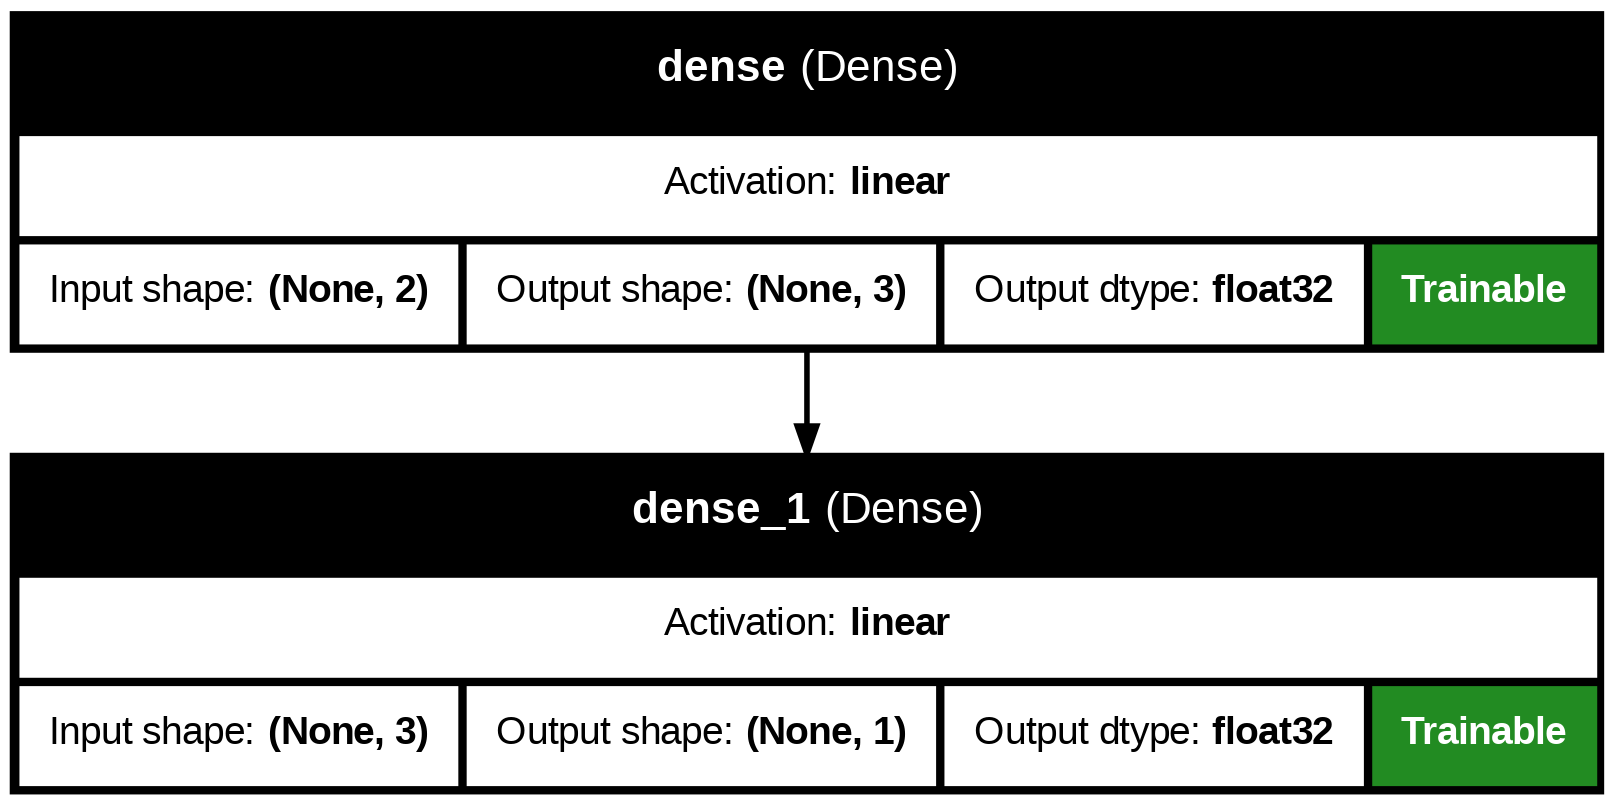

In [ ]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

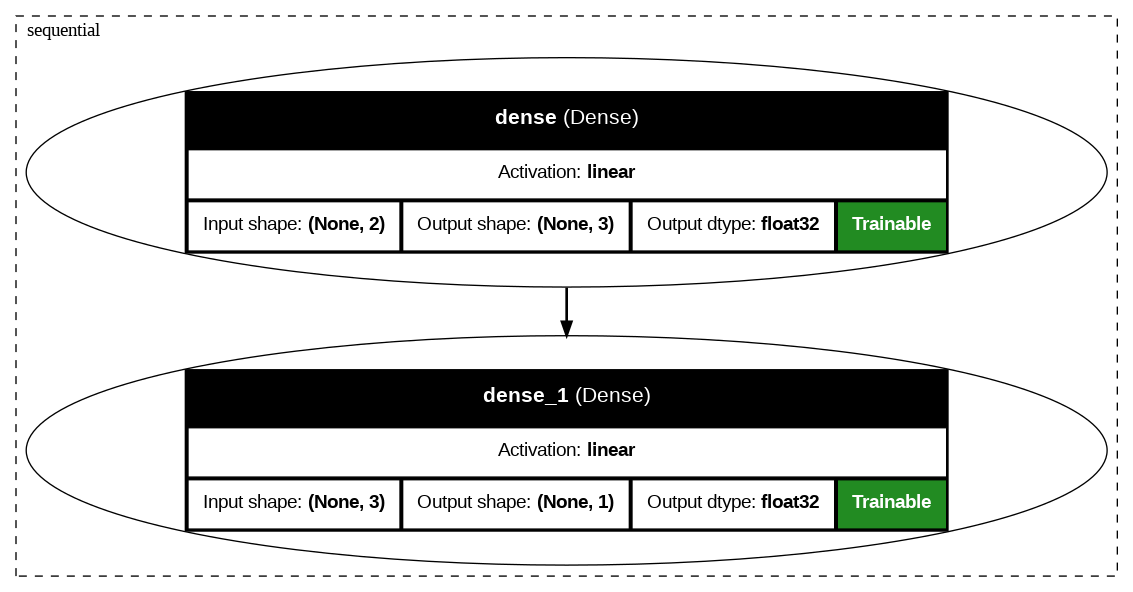

In [ ]:
from IPython.display import SVG, Image
import pydot

dot_graph = keras.utils.model_to_dot(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    subgraph=True, # this line is causing the error as it returns Cluster object
    show_layer_activations=True,
    show_trainable=True
)
# Convert the Cluster to a Dot object
dot_object = pydot.Dot()
dot_object.add_subgraph(dot_graph) # Adding Cluster object as a subgraph to the Dot object

# Now you can use the create method on the Dot object
Image(dot_object.create(prog='dot', format='png'))

In [ ]:
from keras import layers
from keras import models
from matplotlib import pyplot

model = models.Sequential()
# convolution layer learns the local features via the kernel window
# local features are edges, corners, texture ...
model.add(layers.Conv2D(32, (3, 3), activation='relu', use_bias=True, input_shape=(28, 28, 1), name="Conv_Layer_1")) #input_shape(w, h, image_channel), 32 x (5 x 5 + 1) 1 -> bias term
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) # the final layer with 10 outputs
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_Layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

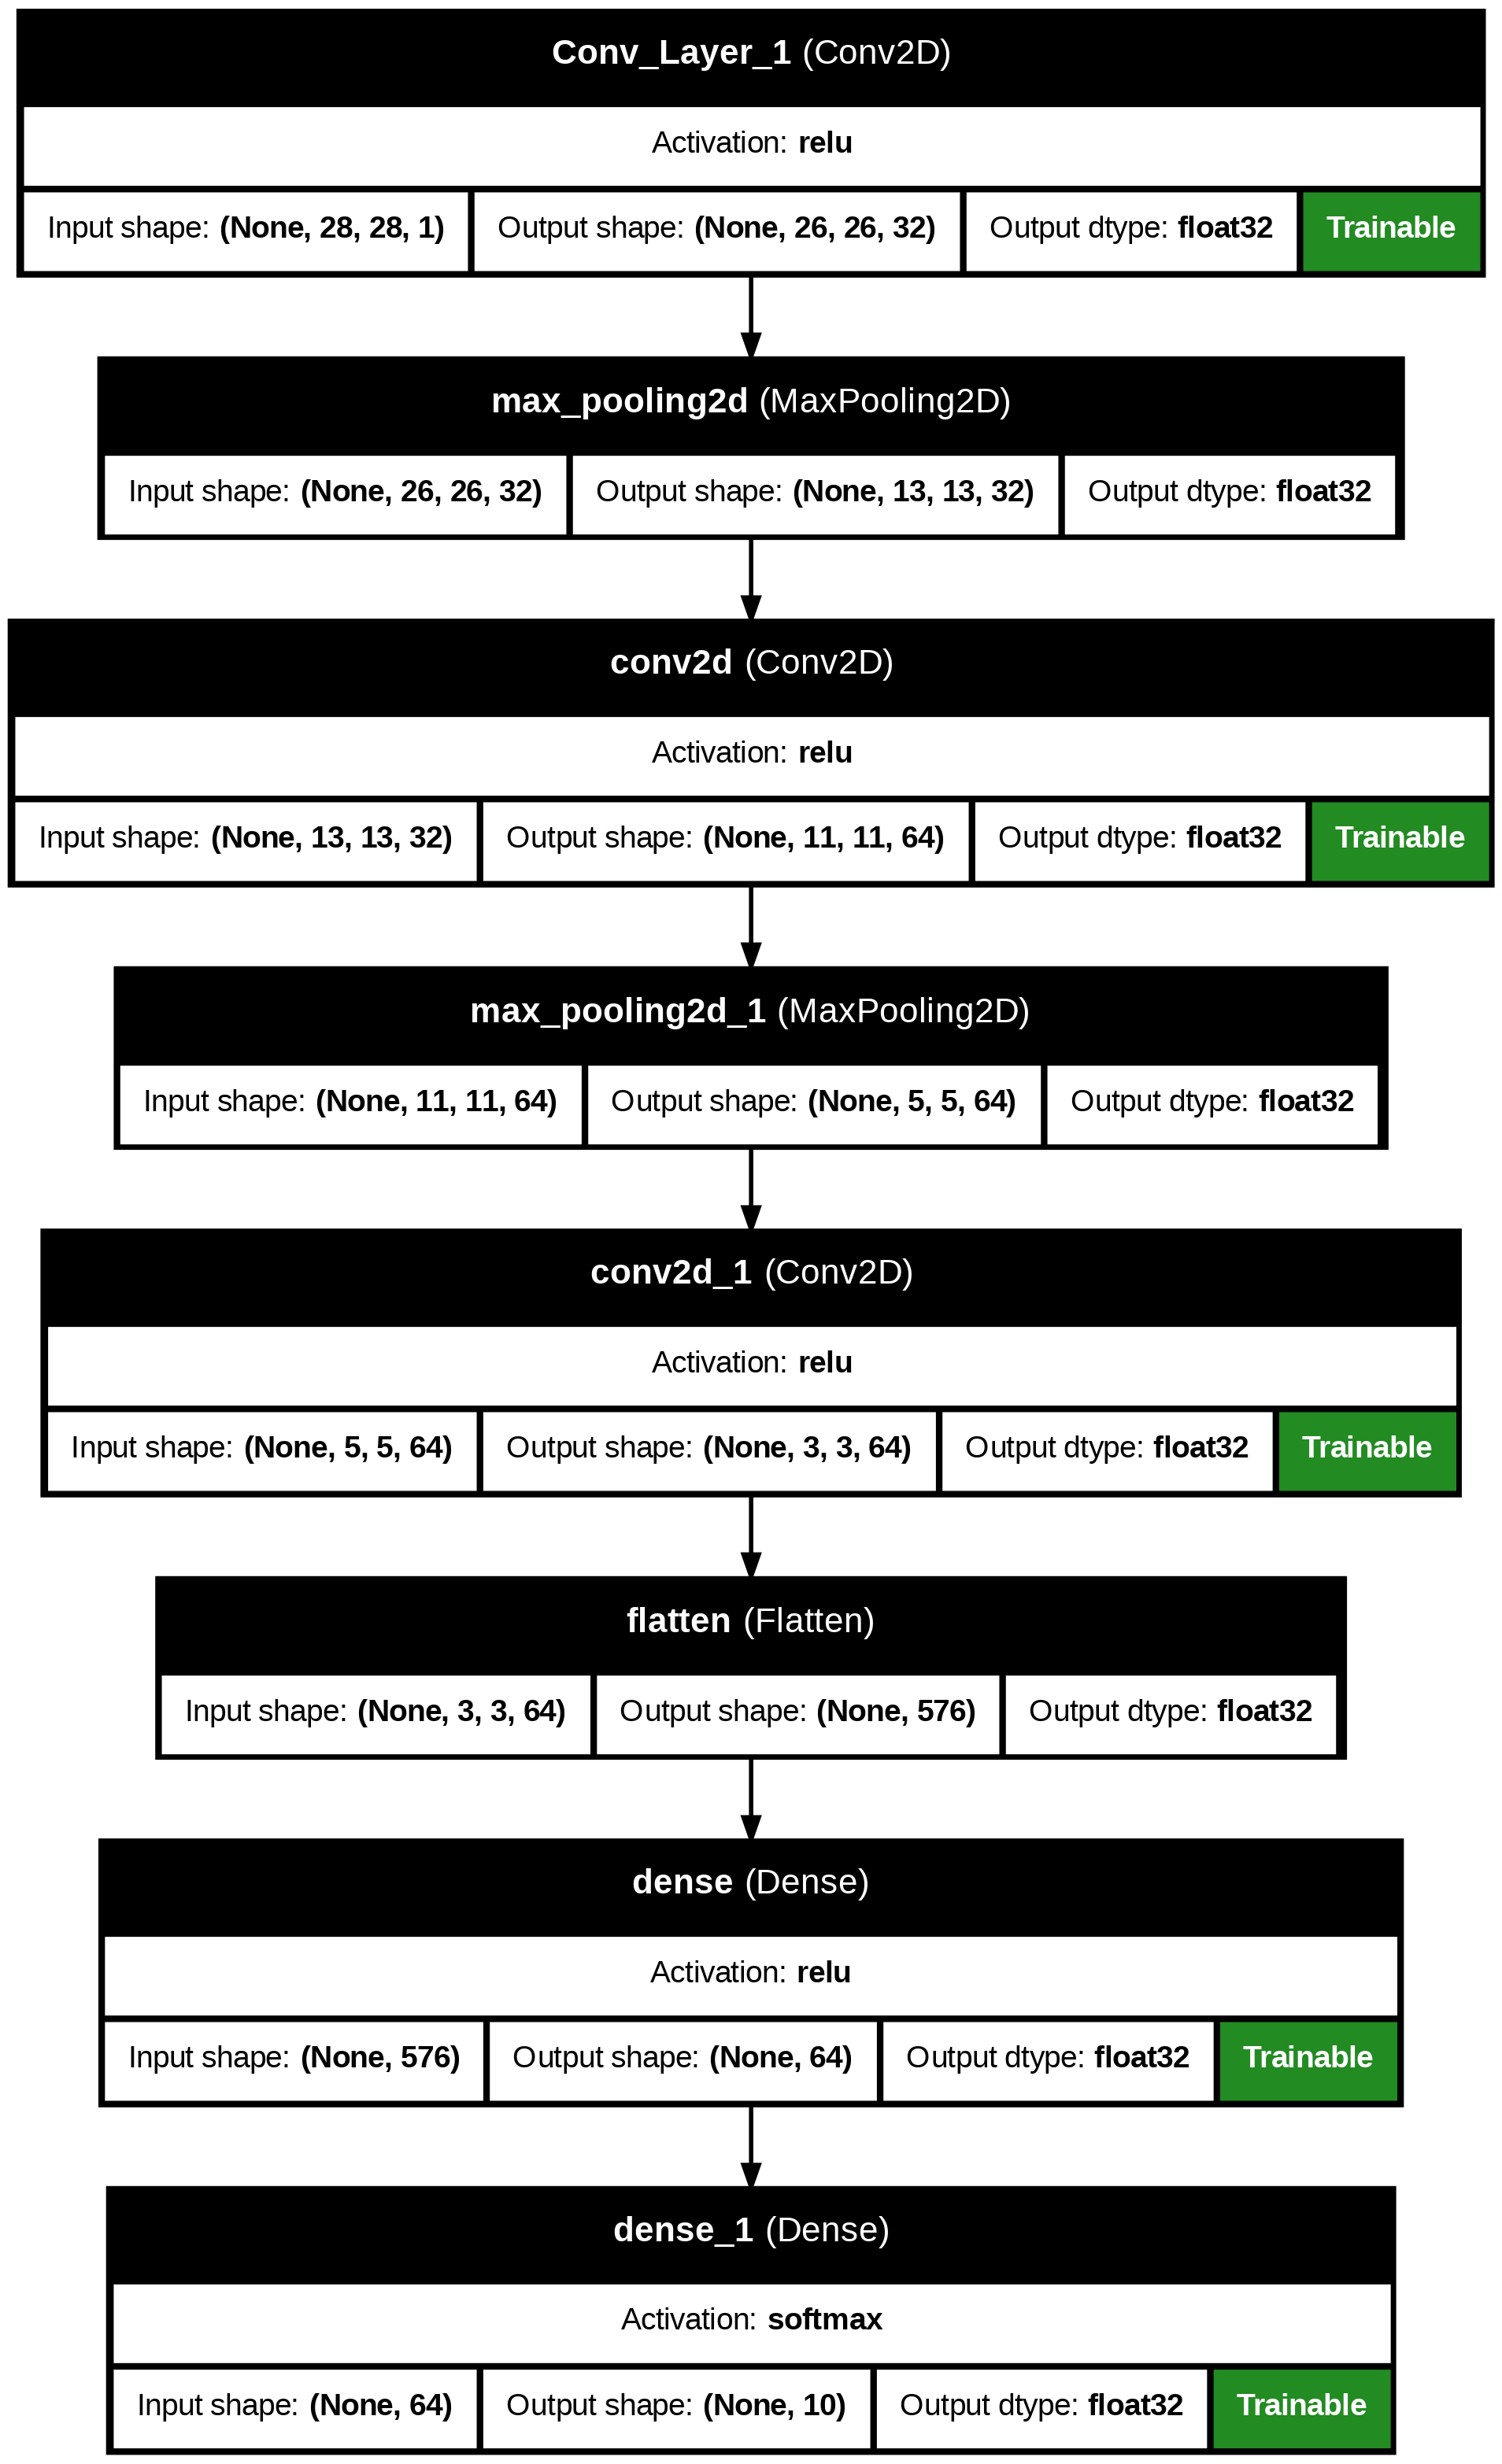

In [ ]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

In [ ]:
# retrieve weights from the hidden layers
for layer in model.layers:
  # check for convolutional layer
  #print(layer.name)
  if 'conv' not in layer.name and 'dense' in layer.name: # Filter for Dense layers only
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    print(layer.get_weights())

    # normalize the weight values to visualize as an image
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # plot the first few filters
    n_filters, ix = 3, 1
    for i in range(n_filters):
      # Check if filters have enough dimensions before slicing
      if filters.ndim >= 4: #check if it has 4 dimensions
          f = filters[:, :, :, i]
          ax = pyplot.subplot(n_filters, 1, ix)
          ax.set_xticks([])
          ax.set_yticks([])
          # plot filter channel in grayscale
          # Check if f has enough dimensions before slicing
          if f.ndim >= 3: #check if it has 3 dimensions
              pyplot.imshow(f[:, :, 1], cmap='gray') #plot f
          ix += 1
     # show the figure
    pyplot.show()

dense_2 (576, 64)
[array([[-8.7423682e-02, -2.4121426e-02,  7.7364296e-02, ...,
         4.3963090e-02,  7.3607996e-02, -2.1898896e-02],
       [-2.7026296e-02,  3.0600280e-02, -1.3038702e-02, ...,
        -5.4594837e-02, -2.3287974e-02, -6.9945753e-02],
       [ 1.9275747e-02, -8.3262138e-02,  5.1361620e-02, ...,
        -8.0689207e-02,  8.0305740e-02,  5.5040509e-02],
       ...,
       [-4.5816593e-02, -6.3934356e-02,  3.6215633e-03, ...,
        -9.4357334e-02, -6.0347307e-02, -1.6359858e-02],
       [-4.1882209e-02,  2.9604405e-02, -4.9159303e-03, ...,
        -9.4547480e-02,  2.5824666e-02,  5.4781124e-02],
       [ 4.2756960e-02, -5.9023537e-02, -8.1433207e-03, ...,
         2.8574452e-02,  7.8305602e-05,  5.9938729e-03]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 

In [ ]:
# Acquire data from MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data.
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

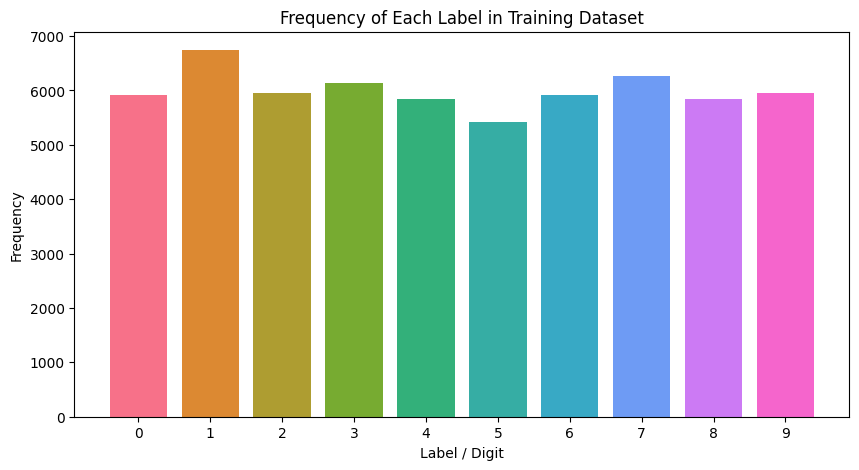

In [ ]:
# Display image
#count of each
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
unique_labels, counts = np.unique(train_labels, return_counts=True)
num_categories = len(unique_labels)

# Create bar graph
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
ax = plt.bar(unique_labels, counts)
palette = sns.color_palette("husl", num_categories)
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(palette[i])
plt.xticks(unique_labels)
plt.title('Frequency of Each Label in Training Dataset')
plt.xlabel('Label / Digit')
plt.ylabel('Frequency')
plt.show()


The digit is:  5


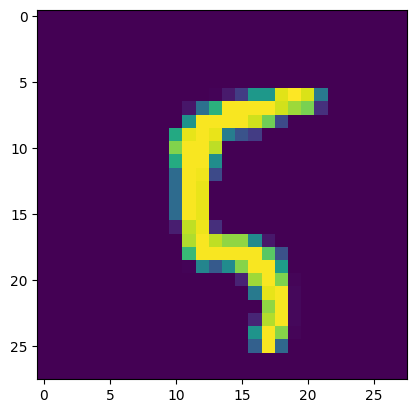

In [ ]:
plt.imshow(train_images[100])
print("The digit is: ", train_labels[100])

In [ ]:
# converting labels to categorical encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
# complile and train the model
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)


Epoch 1/5
723/938 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.8504 - loss: 0.4679

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9888 - loss: 0.0389
0.9914000034332275
